In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Combined_sales7.csv")
df.head()

,Invoice Code,Invoice Created,Shipping Address City,Shipping Address State,Shipping Address Country,Shipping Address Pincode,Billing Address Id,Billing Address City,Billing Address State,Billing Address Country,...,CESS Rate,Sale Order Status,Currency,Sale Order Item Status,Shipping provider,Shipping Package Code,SKU Name,Seller SKU Code,Shipping Courier Status,Shipping Tracking Status
0,I0925NC000006465,1/1/2025 10:05,Mumbai,Maharashtra,IN,401107,20003549,Mumbai,Maharashtra,IN,...,0,COMPLETE,INR,DISPATCHED,flipkartlogistics,NINE04624,Women Regular Kurta with Churidar & With Dupatta,ADKSET157-M,COURIER_RETURN-DELIVERED,RTO_DELIVERED_TO_SELLER
1,I0925NC000006475,1/2/2025 9:50,"Thane,",Maharashtra,IN,400614,20004807,"Thane,",Maharashtra,IN,...,0,COMPLETE,INR,DELIVERED,flipkartlogistics,NINE04625,Women Ethnic Motifs Panelled Sequinned Chander...,ADKSET261-XS,DELIVERED,STATUS_NOT_DEFINED
2,I0925NC000006477,1/2/2025 9:50,"Faridabad,",Haryana,IN,121008,20004884,"Faridabad,",Haryana,IN,...,0,COMPLETE,INR,DISPATCHED,flipkartlogistics,NINE04626,Floral Embroidered Siquinned V-Neck Flared Geo...,ADDRS180-XL,COURIER_RETURN-DELIVERED,RTO_DELIVERED_TO_SELLER
3,I0925NC000006476,1/2/2025 9:49,Varanasi,Uttar Pradesh,IN,221002,20005795,Varanasi,Uttar Pradesh,IN,...,0,COMPLETE,INR,DELIVERED,flipkartlogistics,NINE04627,Embroidered Round Neck Top With Palazzos,ADCRDSET163-M,DELIVERED,STATUS_NOT_DEFINED
4,I0925NC000006480,1/2/2025 9:50,Bengaluru,Karnataka,IN,560048,20006378,Bengaluru,Karnataka,IN,...,0,COMPLETE,INR,DELIVERED,flipkartlogistics,NINE04629,Printed Top With Trousers Co-Ords,ADCRDSET218AA-M,DELIVERED,STATUS_NOT_DEFINED


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860 entries, 0 to 5859
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Shipping Address Id       5860 non-null   int64  
 1   Category                  5860 non-null   object 
 2   Invoice Code              5860 non-null   object 
 3   Invoice Created           5860 non-null   object 
 4   Shipping Address City     5860 non-null   object 
 5   Shipping Address State    5860 non-null   object 
 6   Shipping Address Country  5860 non-null   object 
 7   Shipping Address Pincode  5860 non-null   int64  
 8   Billing Address Id        5860 non-null   int64  
 9   Billing Address City      5860 non-null   object 
 10  Billing Address State     5860 non-null   object 
 11  Billing Address Country   5860 non-null   object 
 12  Billing Address Pincode   5860 non-null   int64  
 13  Shipping Method           5860 non-null   object 
 14  Item SKU

In [6]:
df.describe()

,Shipping Address Id,Shipping Address Pincode,Billing Address Id,Billing Address Pincode,HSN Code,MRP,Total Price,Selling Price,Cost Price,Prepaid Amount,...,CGST,IGST,SGST,UTGST,CESS,CGST Rate,IGST Rate,SGST Rate,UTGST Rate,CESS Rate
count,5.860000e+03,5860.000000,5.860000e+03,5860.000000,5817.0,5672.000000,5860.000000,5860.000000,0.0,5860.000000,...,5860.000000,5860.000000,5860.000000,5860.0,5860.0,5860.000000,5860.000000,5860.000000,5860.0,5860.0
mean,1.907992e+07,395816.746416,1.907992e+07,395816.746416,62045300.0,5329.806241,3424.919261,3424.919261,NaN,347.200625,...,29.502348,307.909937,29.502348,0.0,0.0,0.955717,10.083788,0.955717,0.0,0.0
std,1.091280e+06,218087.939499,1.091280e+06,218087.939499,0.0,1311.621781,919.108663,919.108663,NaN,1030.519872,...,70.832179,161.228016,70.832179,0.0,0.0,2.195503,4.394093,2.195503,0.0,0.0
min,1.703789e+07,110001.000000,1.703789e+07,110001.000000,62045300.0,1599.000000,879.000000,879.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,1.826779e+07,201306.000000,1.826779e+07,201306.000000,62045300.0,4299.000000,2639.000000,2639.000000,NaN,0.000000,...,0.000000,254.890000,0.000000,0.0,0.0,0.000000,12.000000,0.000000,0.0,0.0
50%,1.891841e+07,400064.000000,1.891841e+07,400064.000000,62045300.0,4999.000000,3330.000000,3330.000000,NaN,0.000000,...,0.000000,335.140000,0.000000,0.0,0.0,0.000000,12.000000,0.000000,0.0,0.0
75%,2.010297e+07,560024.000000,2.010297e+07,560024.000000,62045300.0,6499.000000,4199.000000,4199.000000,NaN,0.000000,...,0.000000,437.040000,0.000000,0.0,0.0,0.000000,12.000000,0.000000,0.0,0.0
max,2.095199e+07,855101.000000,2.095199e+07,855101.000000,62045300.0,12999.000000,8999.000000,8999.000000,NaN,7450.000000,...,400.660000,964.180000,400.660000,0.0,0.0,6.000000,12.000000,6.000000,0.0,0.0


# In data Analysis What all things we do
1. Missing Values
2. Explore Numerical Variable
3. Explore Categorical Variable
4. Finding relationships between features

In [16]:
df.isnull().sum()

,0
Shipping Address Id,0
Category,0
Invoice Code,0
Invoice Created,0
Shipping Address City,0
Shipping Address State,0
Shipping Address Country,0
Shipping Address Pincode,0
Billing Address Id,0
Billing Address City,0


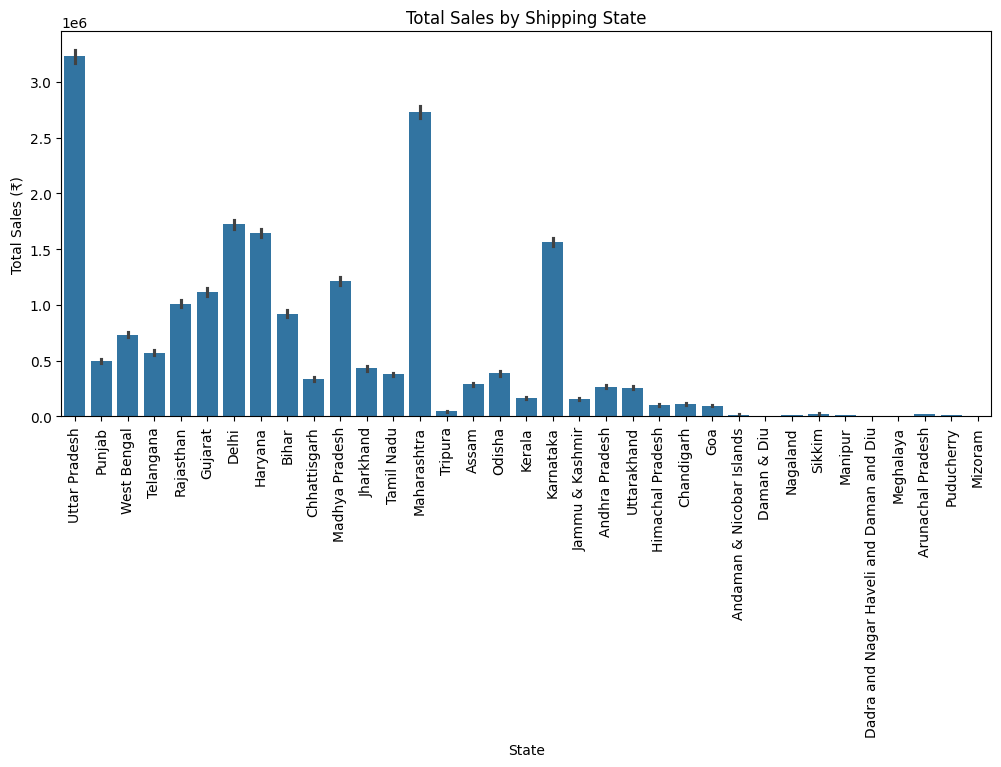

In [17]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df["Shipping Address State"], y=df["Total Price"], estimator=sum)
plt.xticks(rotation=90)
plt.title("Total Sales by Shipping State")
plt.ylabel("Total Sales (₹)")
plt.xlabel("State")
plt.show()


In [18]:
import plotly.express as px

fig = px.scatter_geo(df,
                     locations="Shipping Address State",
                     locationmode="country names",
                     size="Total Price",
                     title="Sales Density by State")
fig.show()


<ipython-input-19-c0c410f6ab98>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




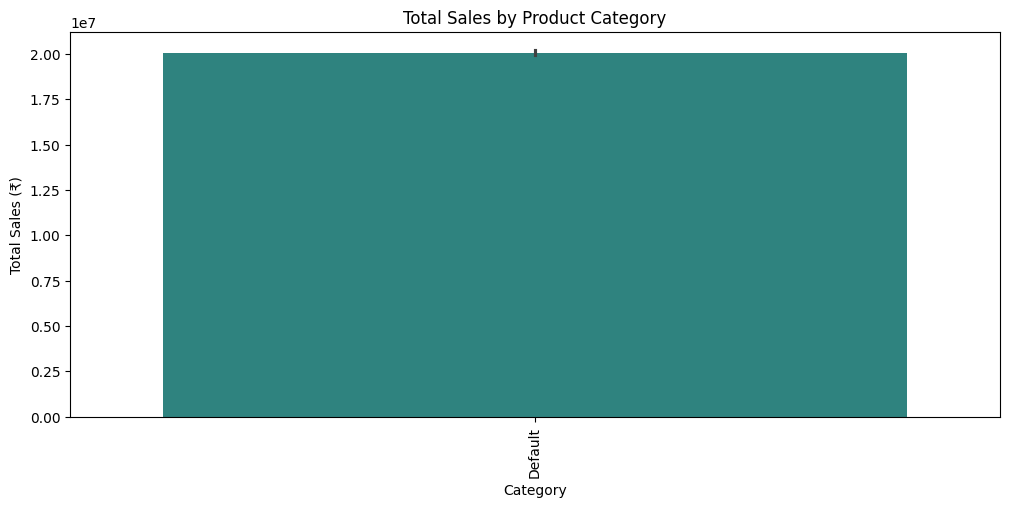

In [19]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df["Category"], y=df["Total Price"], estimator=sum, palette="viridis")
plt.xticks(rotation=90)
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Category")
plt.show()


<ipython-input-21-7932ea49a0c7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




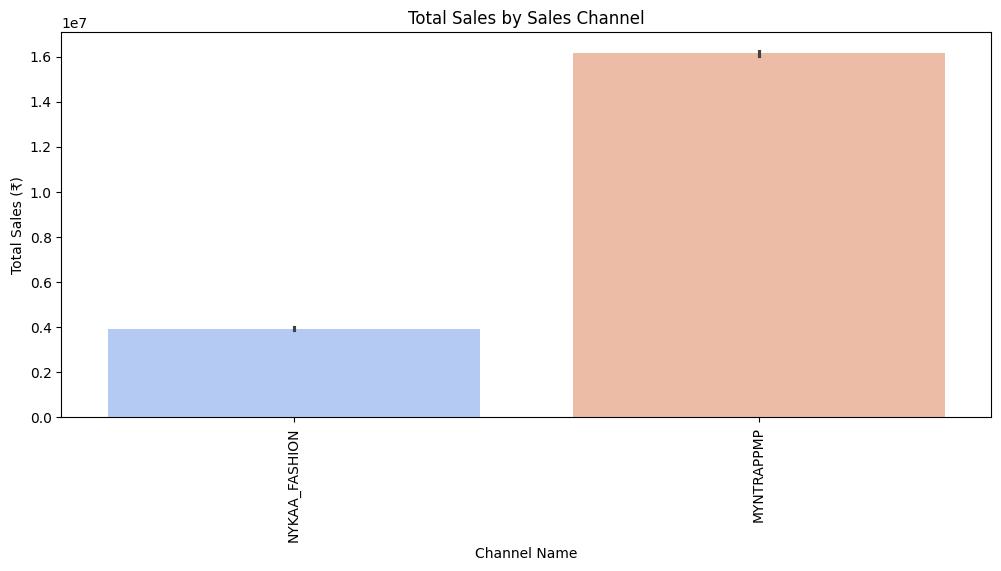

In [21]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df["Channel Name"], y=df["Total Price"], estimator=sum, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Total Sales by Sales Channel")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Channel Name")
plt.show()


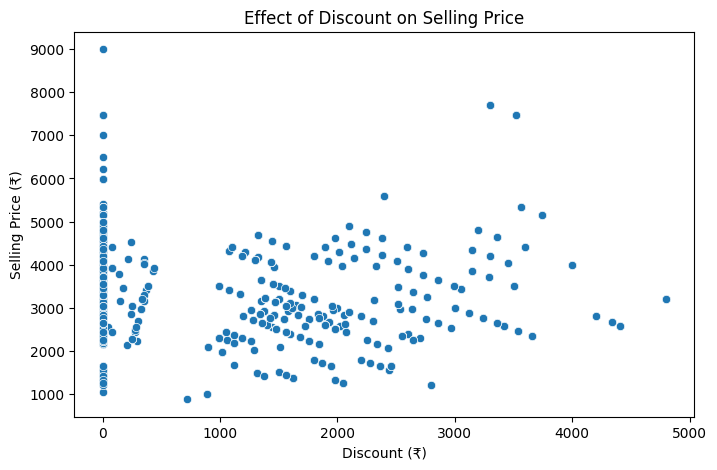

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount"], y=df["Selling Price"])
plt.title("Effect of Discount on Selling Price")
plt.xlabel("Discount (₹)")
plt.ylabel("Selling Price (₹)")
plt.show()


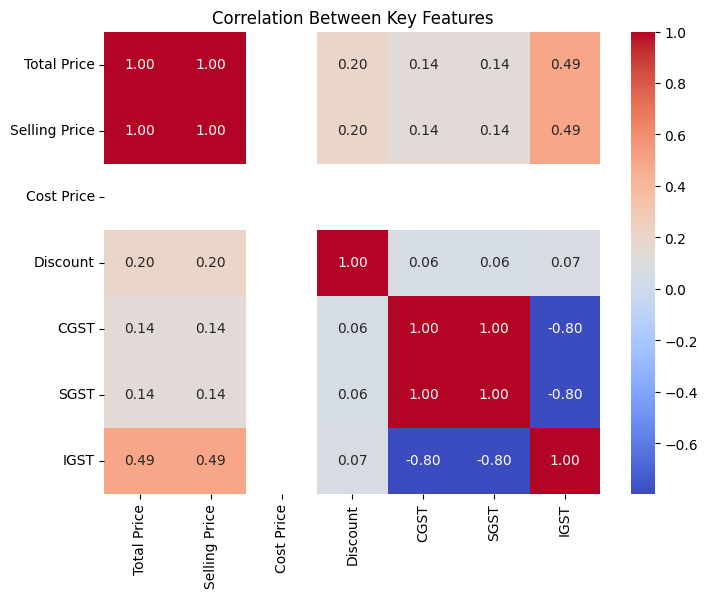

In [23]:
correlation_matrix = df[["Total Price", "Selling Price", "Cost Price", "Discount", "CGST", "SGST", "IGST"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Features")
plt.show()


<ipython-input-31-43ff1cbdfb66>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




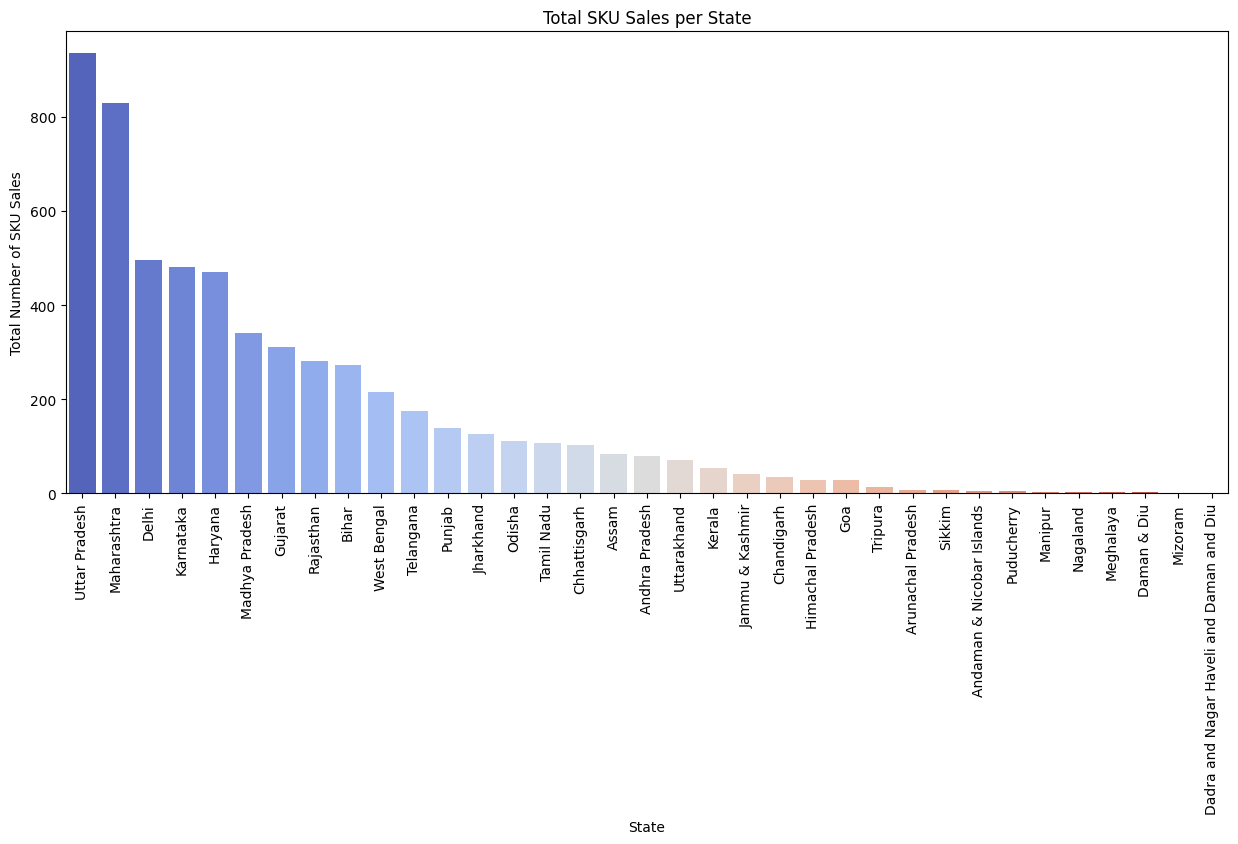

In [31]:
plt.figure(figsize=(15, 6))
sku_sales_count = df.groupby("Shipping Address State")["Item SKU Code"].count().sort_values(ascending=False)

sns.barplot(x=sku_sales_count.index, y=sku_sales_count.values, palette="coolwarm")

plt.xticks(rotation=90)
plt.title("Total SKU Sales per State")
plt.xlabel("State")
plt.ylabel("Total Number of SKU Sales")
plt.show()


<ipython-input-32-c4023ae0083b>:1: UserWarning:

Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



<Figure size 1500x600 with 0 Axes>

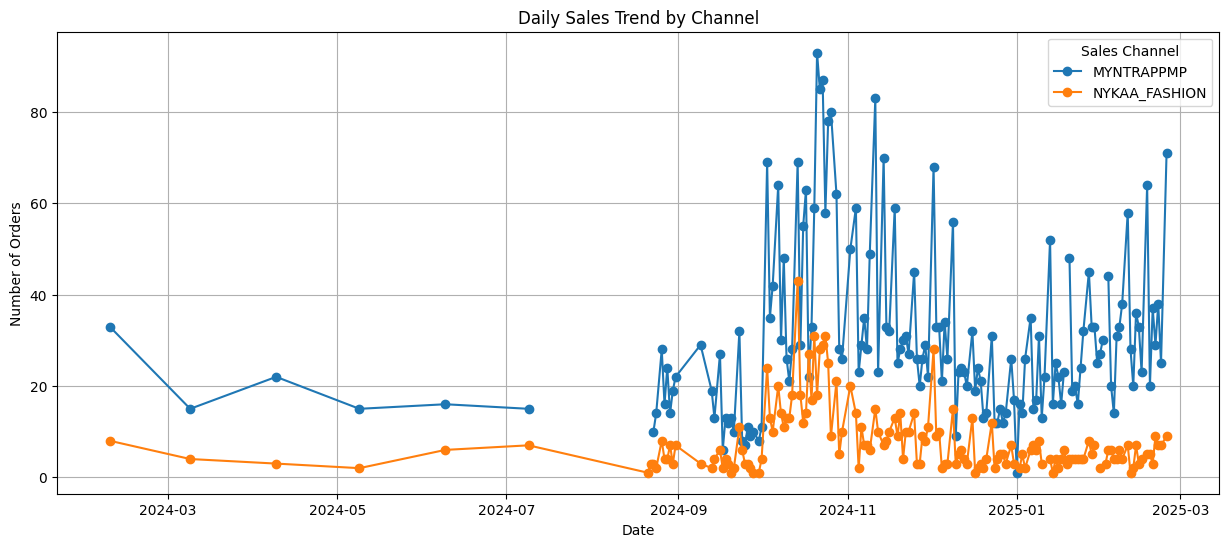

In [32]:
df["Invoice Created"] = pd.to_datetime(df["Invoice Created"])  # Ensure date format
df["Date"] = df["Invoice Created"].dt.date  # Extract date

plt.figure(figsize=(15, 6))
df_grouped = df.groupby(["Date", "Channel Name"])["Invoice Code"].count().unstack()

df_grouped.plot(kind="line", marker="o", figsize=(15, 6))
plt.title("Daily Sales Trend by Channel")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend(title="Sales Channel", bbox_to_anchor=(1,1))
plt.grid()
plt.show()


<ipython-input-35-28b10912b059>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




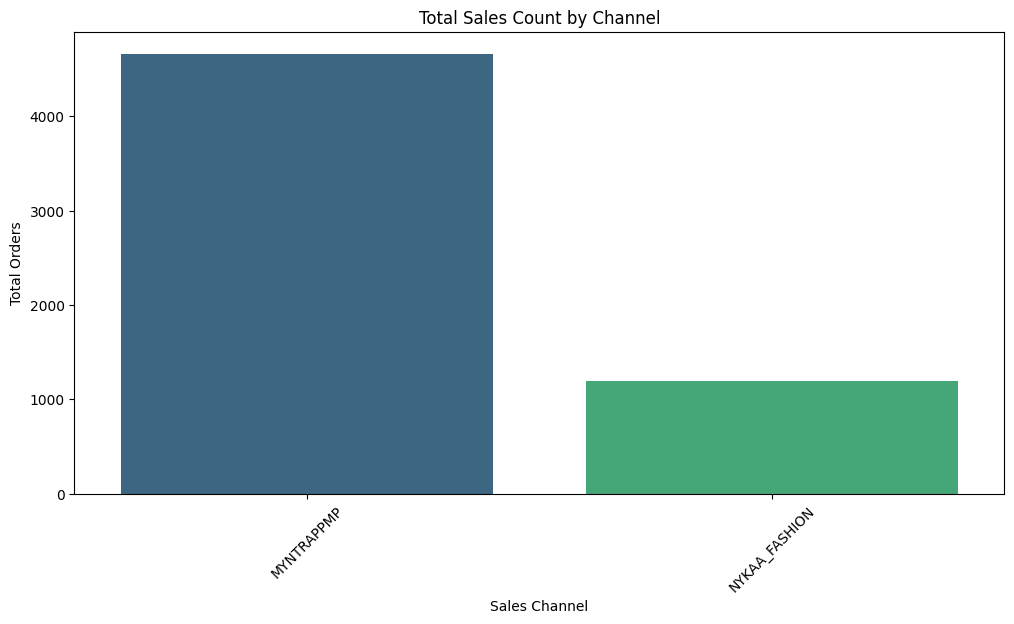

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
channel_sales = df.groupby("Channel Name")["Invoice Code"].count().sort_values(ascending=False)

sns.barplot(x=channel_sales.index, y=channel_sales.values, palette="viridis")

plt.title("Total Sales Count by Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()


<Figure size 1500x600 with 0 Axes>

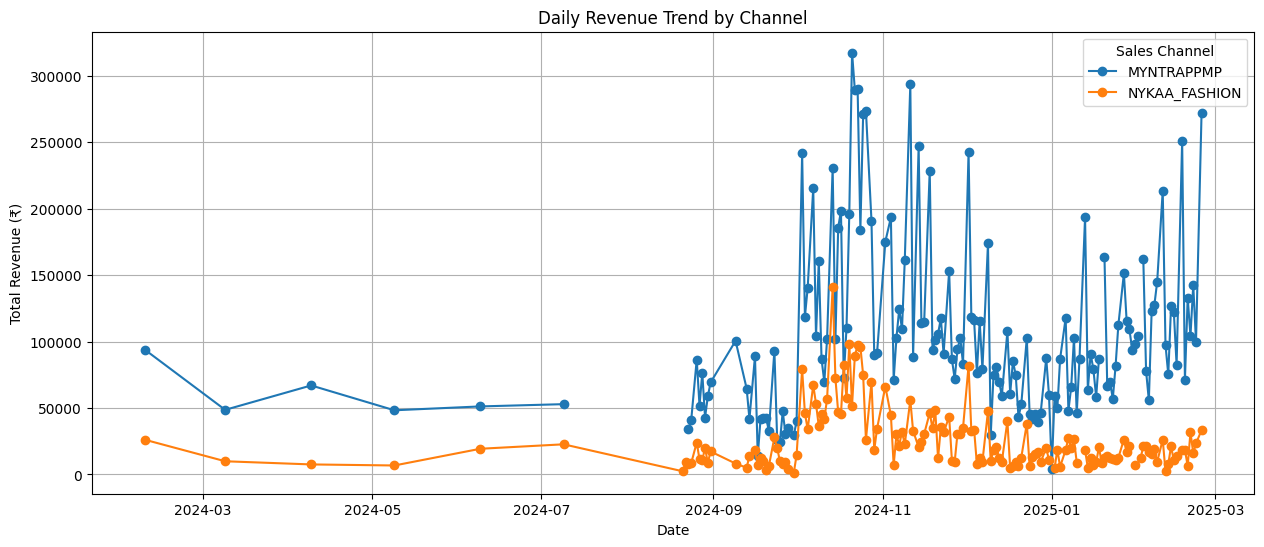

In [8]:
import pandas as pd

df["Invoice Created"] = pd.to_datetime(df["Invoice Created"])  # Ensure date format
df["Date"] = df["Invoice Created"].dt.date  # Extract date

plt.figure(figsize=(15, 6))
df_grouped = df.groupby(["Date", "Channel Name"])["Total Price"].sum().unstack()

df_grouped.plot(kind="line", marker="o", figsize=(15, 6))
plt.title("Daily Revenue Trend by Channel")
plt.xlabel("Date")
plt.ylabel("Total Revenue (₹)")
plt.legend(title="Sales Channel", bbox_to_anchor=(1,1))
plt.grid()
plt.show()


<ipython-input-7-4c990a58f1ad>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_skus.values, y=top_selling_skus.index, palette="viridis")


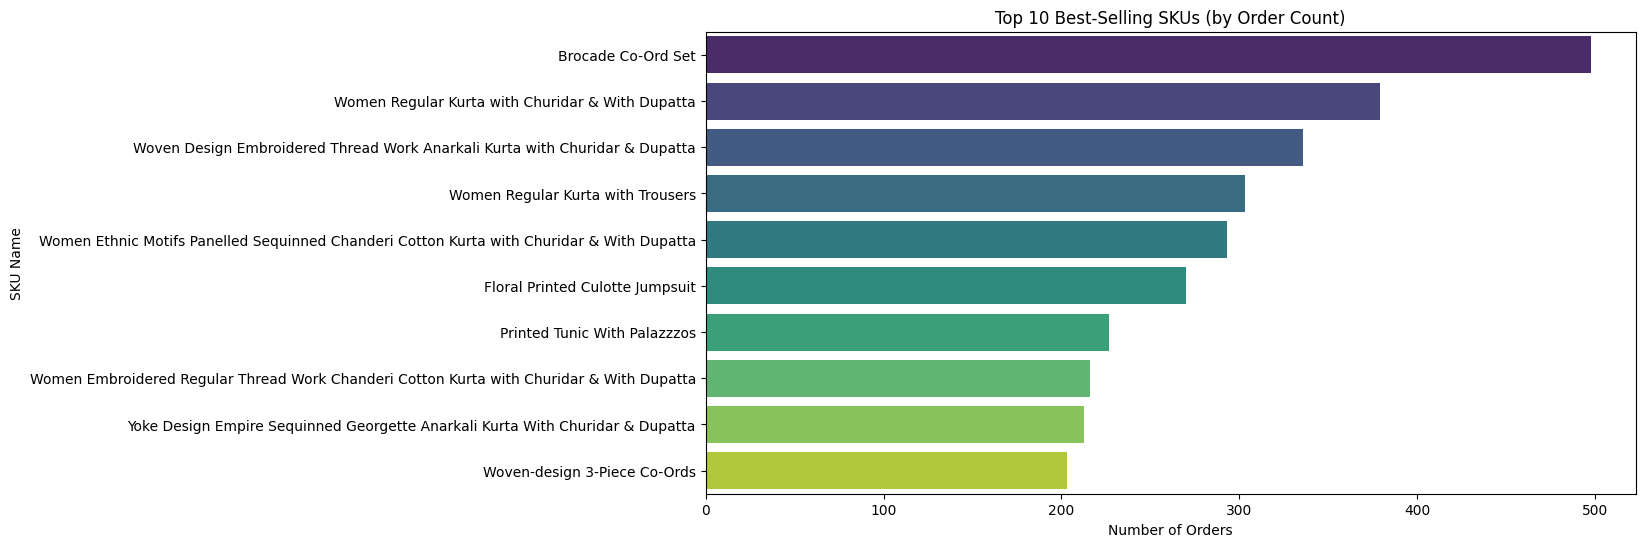

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
top_selling_skus = df.groupby("SKU Name")["Invoice Code"].count().sort_values(ascending=False).head(10)

sns.barplot(x=top_selling_skus.values, y=top_selling_skus.index, palette="viridis")

plt.title("Top 10 Best-Selling SKUs (by Order Count)")
plt.xlabel("Number of Orders")
plt.ylabel("SKU Name")
plt.show()


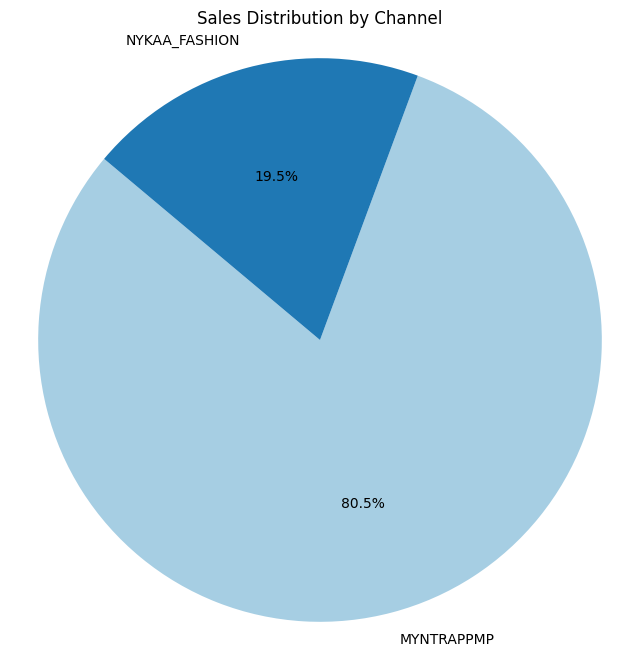

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Combined_sales.csv")  # Update with your correct file path

# Aggregate sales by channel
channel_sales = df.groupby("Channel Name")["Total Price"].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(channel_sales, labels=channel_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Sales Distribution by Channel")
plt.axis("equal")  # Equal aspect ratio ensures pie chart is circular
plt.show()


<ipython-input-10-708d6e20257f>:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Invoice Created"] = pd.to_datetime(df["Invoice Created"])


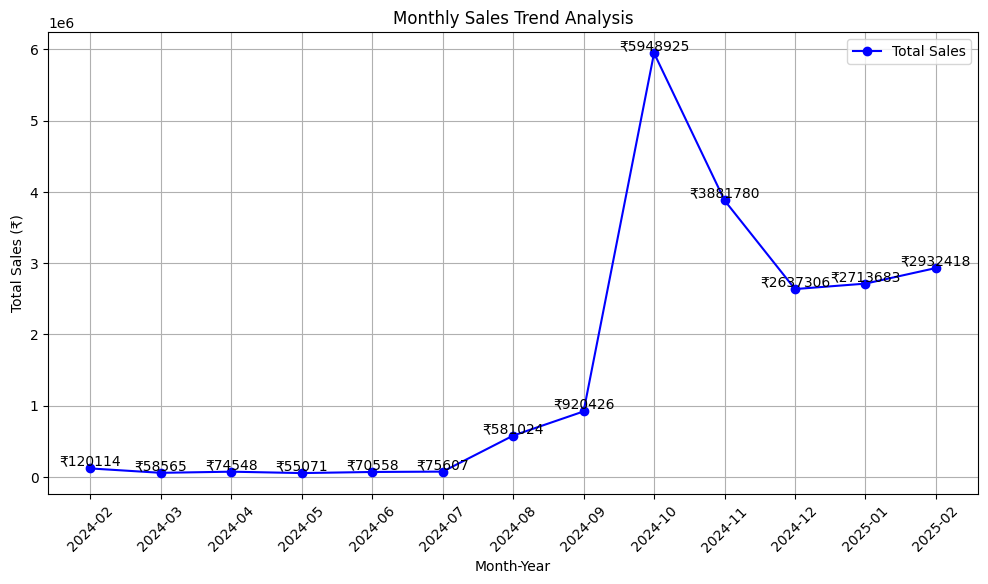

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Combined_sales.csv")  # Update with your correct file path

# Convert invoice creation date to datetime format
df["Invoice Created"] = pd.to_datetime(df["Invoice Created"])

# Extract month and year for trend analysis
df["Year-Month"] = df["Invoice Created"].dt.to_period("M")

# Aggregate total sales by month
monthly_sales = df.groupby("Year-Month")["Total Price"].sum()

# Plot the trend line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales, marker="o", linestyle="-", color="b", label="Total Sales")

# Annotate total sales on the chart
for i, value in enumerate(monthly_sales):
    plt.text(i, value, f"₹{int(value)}", ha="center", va="bottom", fontsize=10, color="black")

# Formatting the chart
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales (₹)")
plt.title("Monthly Sales Trend Analysis")
plt.legend()
plt.grid(True)
plt.show()


Correlation between Discount and Selling Price:
               Discount  Selling Price
Discount       1.000000       0.196749
Selling Price  0.196749       1.000000


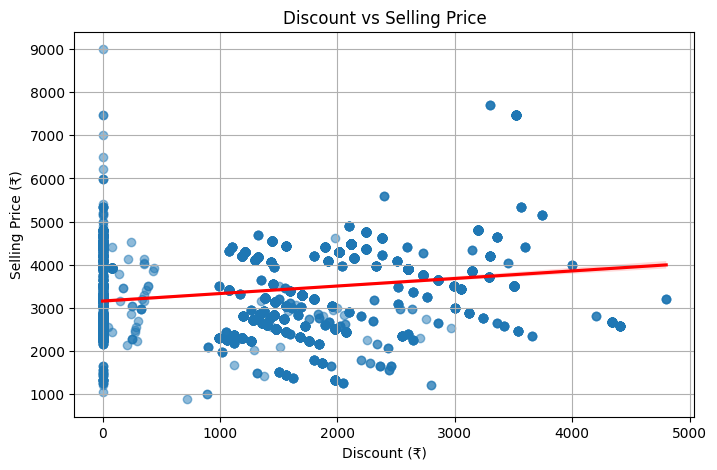

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure relevant columns are numeric
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Selling Price'] = pd.to_numeric(df['Selling Price'], errors='coerce')

# Drop rows with NaN values in the selected columns
df = df.dropna(subset=['Discount', 'Selling Price'])

# Calculate correlation
correlation = df[['Discount', 'Selling Price']].corr()
print("Correlation between Discount and Selling Price:")
print(correlation)

# Plot scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x=df['Discount'], y=df['Selling Price'], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Discount vs Selling Price")
plt.xlabel("Discount (₹)")
plt.ylabel("Selling Price (₹)")
plt.grid(True)
plt.show()